In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from tqdm import tqdm

from glob import glob

import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
train = pd.read_csv('~/Desktop/deploy/trainval/labels.csv') 
train.columns

Index(['guid/image', 'label'], dtype='object')

In [3]:
train0_image = []
batch_size = 32
img_height = 130
img_width = 130
folder0 = ['0','1','2']
for j in folder0:
    path = './train/'+j
    files = glob('{}/*_image.jpg'.format(path))
    print('at file'+j)
    for i in files:
        img = image.load_img(i,target_size = (img_width, img_height))
        img = image.img_to_array(img)
        img = img/255
        train0_image.append(img)
            
X0 = np.array(train0_image)


at file0
at file1
at file2


In [40]:
column_names = ['guid', 'label']
df = pd.read_csv('~/Desktop/deploy/trainval/trainval_labels.csv', names=column_names)
df = df.sort_values(df.columns[1])
df = df.iloc[:-1 , :]
trainval_guid = df.guid.tolist()

In [7]:
y = np.array(df.drop(['guid'],axis=1))
y = y.astype(float)
y.shape

(7573, 1)

In [9]:
X0_train, X0_test, y_train,y_test = train_test_split(X0,y,random_state = 42, test_size = 0.1)

In [11]:
#create model
model = Sequential()
#add a convolution layer to detect features in image
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(img_width,img_height,3)))
#Add a pooling layer to remove sensitivity to position in the image of the feature
model.add(MaxPooling2D(pool_size=(2, 2)))
#repeat
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 16)      1216      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 63, 63, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 59, 59, 32)        12832     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 29, 29, 32)       

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
history = model.fit(X0_train, y_train, epochs=150, validation_data=(X0_test, y_test), batch_size=64)

Epoch 1/150


/Users/jsuh1/opt/anaconda3/envs/keras_env/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


107/107 [==============================] - 54s 493ms/step - loss: 1.3594 - accuracy: 0.4330 - val_loss: 1.0090 - val_accuracy: 0.4683
Epoch 2/150
107/107 [==============================] - 52s 482ms/step - loss: 1.0527 - accuracy: 0.4684 - val_loss: 1.0087 - val_accuracy: 0.4683
Epoch 3/150
107/107 [==============================] - 51s 480ms/step - loss: 1.0070 - accuracy: 0.4703 - val_loss: 0.9772 - val_accuracy: 0.4683
Epoch 4/150
107/107 [==============================] - 51s 480ms/step - loss: 0.9915 - accuracy: 0.4756 - val_loss: 0.9725 - val_accuracy: 0.4683
Epoch 5/150
107/107 [==============================] - 52s 483ms/step - loss: 0.9792 - accuracy: 0.4858 - val_loss: 1.0047 - val_accuracy: 0.4683
Epoch 6/150
107/107 [==============================] - 52s 488ms/step - loss: 0.9781 - accuracy: 0.4817 - val_loss: 0.9869 - val_accuracy: 0.4683
Epoch 7/150
107/107 [==============================] - 53s 492ms/step - loss: 0.9725 - accuracy: 0.4835 - val_loss: 0.9842 - val_accurac

Epoch 57/150
107/107 [==============================] - 51s 472ms/step - loss: 0.6647 - accuracy: 0.6178 - val_loss: 0.8343 - val_accuracy: 0.5119
Epoch 58/150
107/107 [==============================] - 51s 473ms/step - loss: 0.6565 - accuracy: 0.6236 - val_loss: 0.8884 - val_accuracy: 0.5198
Epoch 59/150
107/107 [==============================] - 51s 481ms/step - loss: 0.6614 - accuracy: 0.6406 - val_loss: 0.8379 - val_accuracy: 0.5224
Epoch 60/150
107/107 [==============================] - 52s 488ms/step - loss: 0.6563 - accuracy: 0.6351 - val_loss: 0.8592 - val_accuracy: 0.5132
Epoch 61/150
107/107 [==============================] - 51s 475ms/step - loss: 0.6650 - accuracy: 0.6249 - val_loss: 0.8783 - val_accuracy: 0.5369
Epoch 62/150
107/107 [==============================] - 51s 474ms/step - loss: 0.6474 - accuracy: 0.6371 - val_loss: 0.8781 - val_accuracy: 0.5040
Epoch 63/150
107/107 [==============================] - 53s 493ms/step - loss: 0.6381 - accuracy: 0.6472 - val_loss: 0

107/107 [==============================] - 51s 478ms/step - loss: 0.4832 - accuracy: 0.7676 - val_loss: 0.9902 - val_accuracy: 0.5528
Epoch 113/150
107/107 [==============================] - 51s 476ms/step - loss: 0.4908 - accuracy: 0.7639 - val_loss: 1.0149 - val_accuracy: 0.5528
Epoch 114/150
107/107 [==============================] - 51s 475ms/step - loss: 0.4762 - accuracy: 0.7712 - val_loss: 1.0197 - val_accuracy: 0.5356
Epoch 115/150
107/107 [==============================] - 52s 483ms/step - loss: 0.4809 - accuracy: 0.7749 - val_loss: 1.0059 - val_accuracy: 0.5369
Epoch 116/150
107/107 [==============================] - 51s 477ms/step - loss: 0.4795 - accuracy: 0.7668 - val_loss: 1.0204 - val_accuracy: 0.5317
Epoch 117/150
107/107 [==============================] - 51s 474ms/step - loss: 0.4710 - accuracy: 0.7715 - val_loss: 0.9802 - val_accuracy: 0.5462
Epoch 118/150
107/107 [==============================] - 51s 478ms/step - loss: 0.4728 - accuracy: 0.7723 - val_loss: 1.0043 -

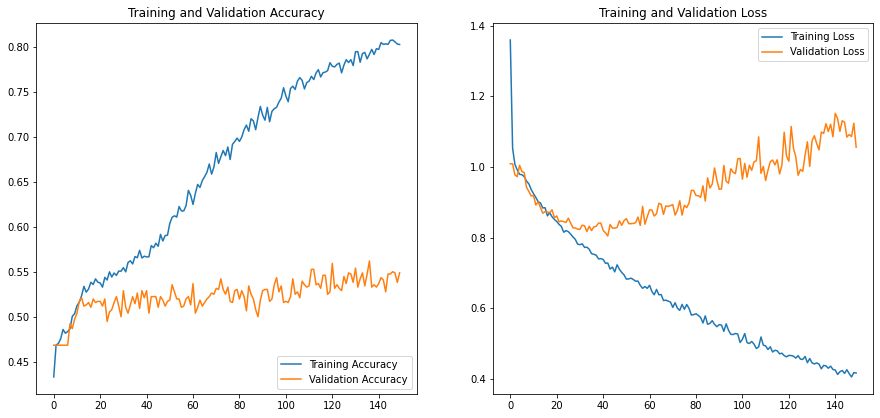

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(150)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
test_image = []
testfolder = ['test']

for path in testfolder:
    files = glob('{}/*/*_image.jpg'.format(path))
    for i in files:
        img = image.load_img(i,target_size = (img_width, img_height))
        img = image.img_to_array(img)
        img = img/255
        test_image.append(img)
            
X = np.array(test_image)



In [25]:
classes = np.array(train.columns[1:])
Y = model.predict(X)

In [39]:
files = glob('{}/*/*_image.jpg'.format('test'))
files.sort()
import csv
name = '{}/test_labels_cnn.csv'.format('test')
class_names = ['0','1','2']
with open(name, 'w') as f:
    writer = csv.writer(f, delimiter=',', lineterminator='\n')
    writer.writerow(['guid/image', 'label'])
    for file in files:
        guid = file.split('/')[-2]
        idx = file.split('/')[-1].replace('_image.jpg', '')
        img = tf.keras.utils.load_img(
        file, target_size=(img_height, img_width)
        )
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) # Create a batch

        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions)
        label = class_names[np.argmax(score)]
        writer.writerow(['{}/{}'.format(guid, idx), label])
    print('Wrote report file `{}`'.format(name))

Wrote report file `test/test_labels_cnn.csv`
